<a href="https://colab.research.google.com/github/KalaiselviNarendar/Machine-Learning/blob/main/Polynomial_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [37]:
np.random.seed(0)
x=2-3*np.random.normal(0,1,20)
y=x-2*(x**2)+0.5*(x**3)+np.random.normal(-3,3,20)
print(x,y)

[-3.29215704  0.79952837 -0.93621395 -4.7226796  -3.60267397  4.93183364
 -0.85026525  2.45407162  2.30965656  0.76820449  1.56786929 -2.36282052
 -0.28311318  1.63497495  0.6684103   0.99897702 -2.48223722  2.61547479
  1.0607969   4.56228722] [ -53.46841187   -1.26255958   -3.50619264 -107.22320039  -49.13195018
    8.90122353   -5.46624176   -5.76263165   -0.60058568    1.2226779
   -3.95663744  -21.98989452   -6.11812275  -10.46843964   -4.11955719
   -3.02941914  -21.76152272   -1.51295226   -4.75491157    6.50723268]


In [38]:
x=x[:,np.newaxis]
y=y[:,np.newaxis]
print(x,y)

[[-3.29215704]
 [ 0.79952837]
 [-0.93621395]
 [-4.7226796 ]
 [-3.60267397]
 [ 4.93183364]
 [-0.85026525]
 [ 2.45407162]
 [ 2.30965656]
 [ 0.76820449]
 [ 1.56786929]
 [-2.36282052]
 [-0.28311318]
 [ 1.63497495]
 [ 0.6684103 ]
 [ 0.99897702]
 [-2.48223722]
 [ 2.61547479]
 [ 1.0607969 ]
 [ 4.56228722]] [[ -53.46841187]
 [  -1.26255958]
 [  -3.50619264]
 [-107.22320039]
 [ -49.13195018]
 [   8.90122353]
 [  -5.46624176]
 [  -5.76263165]
 [  -0.60058568]
 [   1.2226779 ]
 [  -3.95663744]
 [ -21.98989452]
 [  -6.11812275]
 [ -10.46843964]
 [  -4.11955719]
 [  -3.02941914]
 [ -21.76152272]
 [  -1.51295226]
 [  -4.75491157]
 [   6.50723268]]


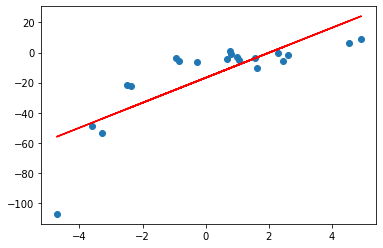

In [28]:
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
plt.scatter(x,y)
plt.plot(x,y_pred,color='r')
plt.show()

**We can see that the straight line is unable to capture the patterns in the data. This is an example of under-fitting**

In [17]:
from sklearn.metrics import mean_squared_error,r2_score
rmse=np.sqrt(mean_squared_error(y,y_pred))
r2=r2_score(y,y_pred)
print("RMSE score is: ",rmse)
print("R2 score is: ",r2)

RMSE score is:  15.908242501429998
R2 score is:  0.6386750054827146


**To overcome under-fitting, we need to increase the complexity of the model.**

To generate a higher order equation we can add powers of the original features as new features. The linear model, y=mx+c
can be transformed to
y=c+b1x+b2(x**2)

This is still considered to be linear model as the coefficients/weights associated with the features are still linear. x**2 is only a feature. However the curve that we are fitting is quadratic in nature.

In [19]:
import operator
from sklearn.preprocessing import PolynomialFeatures

RMSE score is:  10.120437473614711
R2 score is:  0.8537647164420812


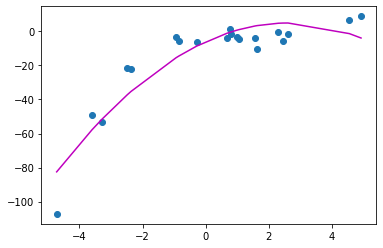

In [43]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features=PolynomialFeatures(degree=2)
x_poly=polynomial_features.fit_transform(x)
model=LinearRegression()
model.fit(x_poly,y)
y_poly_pred=model.predict(x_poly)

rmse_poly=np.sqrt(mean_squared_error(y,y_poly_pred))
r2_poly=r2_score(y,y_poly_pred)
print("RMSE score is: ",rmse_poly)
print("R2 score is: ",r2_poly)

plt.scatter(x,y)
sort_axis=operator.itemgetter(0)
sorted_zip=sorted(zip(x,y_poly_pred),key=sort_axis)
x,y_poly_pred=zip(*sorted_zip)
plt.plot(x,y_poly_pred,color='m')
plt.show()

**RMSE has decreased and R²-score has increased as compared to the linear line.**

RMSE score is:  3.293351887947394
R2 score is:  0.9845143345421614


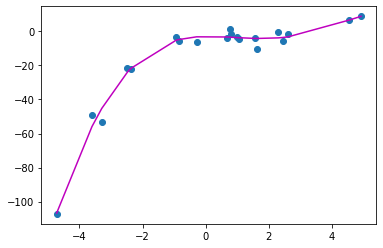

In [47]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features=PolynomialFeatures(degree=5)
x_poly=polynomial_features.fit_transform(x)
model=LinearRegression()
model.fit(x_poly,y)
y_poly_pred=model.predict(x_poly)

rmse_poly=np.sqrt(mean_squared_error(y,y_poly_pred))
r2_poly=r2_score(y,y_poly_pred)
print("RMSE score is: ",rmse_poly)
print("R2 score is: ",r2_poly)

plt.scatter(x,y)
sort_axis=operator.itemgetter(0)
sorted_zip=sorted(zip(x,y_poly_pred),key=sort_axis)
x,y_poly_pred=zip(*sorted_zip)
plt.plot(x,y_poly_pred,color='m')
plt.show()

for degree 5 it fits much better if we increase the degree then the model will become as overfit model